In [1]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
import utils

import pandas as pd
import numpy as np
import pickle
import re
import sympy as smp
import edist.ted as ted

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import itertools

In [2]:
data = utils.create_all_data("Cluster_outputs")
data

Cluster_outputs/differential_evolution


In [2]:
funcs_dict = {
    "F1_specific": "lambda x: 1.57 + 24.3*x", "F4_specific": "lambda x: -2.3 + 0.13*np.sin(x)", 
    "F5_specific": "lambda x: 3 + 2.13*np.log(x)", "F6_specific": "lambda x: 1.3 + 0.13*np.sqrt(x)",
    "F7_specific": "lambda x: 213.809408*(1-np.exp(-0.547237*x))", 
    "F11_specific": "lambda x: 6.87 + 11*np.cos(7.23*x**3)",
    "F1": "lambda x: 1.57 + 24.3*x", "F4": "lambda x: -2.3 + 0.13*np.sin(x)", 
    "F5": "lambda x: 3 + 2.13*np.log(x)", "F6": "lambda x: 1.3 + 0.13*np.sqrt(x)",
    "F7": "lambda x: 213.809408*(1-np.exp(-0.547237*x))", 
    "F11": "lambda x: 6.87 + 11*np.cos(7.23*x**3)",
    "logistic_specific": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "logistic": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "logistic_noTanh": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "projectile_motion_specific": "lambda x: 6*x -9.8*x**2",
    "projectile_motion": "lambda x: 6*x -9.8*x**2",
    "damped_pendulum_specific": "lambda x: np.exp(-x/10)*(3*np.cos(2*x))",
    "damped_pendulum": "lambda x: np.exp(-x/10)*(3*np.cos(2*x))",
    "radioactive_decay_specific": "lambda x: 10*np.exp(-0.5*x)", 
    "radioactive_decay": "lambda x: 10*np.exp(-0.5*x)"
    }

expected_data = pd.DataFrame(columns=["nodes", "adj", "problem", "expected_string"])
expected_data

symbols = {"x": smp.symbols("x", positive=True, real=True)}

for name, function in funcs_dict.items():
    function = function[10:]
    function = smp.parse_expr(function.replace("np.", ""), local_dict=symbols).simplify()
    tree = utils.exprToTree(function, single_name=True)
    node, adj = tree.parentChildRepr().values()
    df = pd.DataFrame([{"nodes": node, "adj": adj, "problem": name, "expected_string": function,
                          "expected_tree": tree}])
    expected_data = pd.concat([expected_data, df])

expected_data.set_index("problem", drop=True, inplace=True)
expected_data

,nodes,adj,expected_string,expected_tree
problem,,,,
F1_specific,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",24.3*x + 1.57,"(+, C, *, C, x)"
F4_specific,"[+, C, *, C, sin, x]","[[1, 2], [], [3, 4], [], [5], []]",0.13*sin(x) - 2.3,"(+, C, *, C, sin, x)"
F5_specific,"[+, C, *, C, log, x]","[[1, 2], [], [3, 4], [], [5], []]",2.13*log(x) + 3,"(+, C, *, C, log, x)"
F6_specific,"[+, C, *, C, **, x, C]","[[1, 2], [], [3, 4], [], [5, 6], [], []]",0.13*sqrt(x) + 1.3,"(+, C, *, C, **, x, C)"
F7_specific,"[+, C, *, C, exp, *, C, x]","[[1, 2], [], [3, 4], [], [5], [6, 7], [], []]",213.809408 - 213.809408*exp(-0.547237*x),"(+, C, *, C, exp, *, C, x)"
F11_specific,"[+, C, *, C, cos, *, C, **, x, C]","[[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...",11.0*cos(7.23*x**3) + 6.87,"(+, C, *, C, cos, *, C, **, x, C)"
F1,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",24.3*x + 1.57,"(+, C, *, C, x)"
F4,"[+, C, *, C, sin, x]","[[1, 2], [], [3, 4], [], [5], []]",0.13*sin(x) - 2.3,"(+, C, *, C, sin, x)"
F5,"[+, C, *, C, log, x]","[[1, 2], [], [3, 4], [], [5], []]",2.13*log(x) + 3,"(+, C, *, C, log, x)"


In [7]:
with open("article_data.pickle", "wb") as file:
    pickle.dump(data, file)

with open("expected_data.pickle", "wb") as file:
    pickle.dump(expected_data, file)

NameError: name 'data' is not defined

In [3]:
with open("ted_data.pickle", "rb") as file:
    ted_data = pickle.load(file)

with open("ted_data_original.pickle", "rb") as file:
    ted_data_original = pickle.load(file)

In [4]:
def print_full(df, lines=100):
    pd.set_option('display.max_rows', lines)
    display(df.head(lines))
    pd.reset_option('display.max_rows')

In [11]:
print_full(ted_data, 10)

,nodes,adj,optimization,problem,index,MSE,training_time(s),solution_string,expression,TED,expected_nodes
0,"[*, C, tan, cos, *, C, x]","[[1, 2], [], [3], [4], [5, 6], [], []]",differential_evolution,damped_pendulum,0,6.107459e-01,5452.419298,1.93050193050193*tan(cos(2*x)),e^{-x/10}*3cos(2x),20.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
1,"[+, *, C, sin, +, C, *, C, x, cos, +, C, *, C, x]","[[1, 9], [2, 3], [], [4], [5, 6], [], [7, 8], ...",differential_evolution,damped_pendulum,1,1.424096e+00,2568.315022,-sin(2*x - 1) + cos(1905627*x/967709 - 212926/...,e^{-x/10}*3cos(2x),30.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
2,"[*, C, cos, +, C, *, C, x]","[[1, 2], [], [3], [4, 5], [], [6, 7], [], []]",differential_evolution,damped_pendulum,2,4.611947e-01,2379.969260,3.13907167377595*cos(1113847*x/557120 + 627041...,e^{-x/10}*3cos(2x),22.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
3,"[+, C, *, C, cos, cos, x]","[[1, 2], [], [3, 4], [], [5], [6], []]",differential_evolution,damped_pendulum_specific,0,4.617531e-01,4258.475051,10.3990689774009 - 13.6097751482811*cos(cos(x)),e^{-x/10}*3cos(2x),26.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
4,"[*, C, cos, *, C, x]","[[1, 2], [], [3], [4, 5], [], []]",differential_evolution,damped_pendulum_specific,1,5.540477e-01,2570.202753,2.71828182845856*cos(2*x),e^{-x/10}*3cos(2x),20.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
5,"[*, C, cos, *, C, x]","[[1, 2], [], [3], [4, 5], [], []]",differential_evolution,damped_pendulum_specific,2,4.615806e-01,2187.671899,3.13875864625512*cos(2*x),e^{-x/10}*3cos(2x),20.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
6,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",differential_evolution,F1,0,2.388628e-29,5438.954849,24.3*x + 1.57,1.57 + 24.3x,0.0,"[+, C, *, C, x]"
7,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",differential_evolution,F1,1,1.417464e-29,5647.433049,24.3*x + 1.57,1.57 + 24.3x,0.0,"[+, C, *, C, x]"
8,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",differential_evolution,F1,2,2.047873e-29,5489.641307,24.3*x + 1.57,1.57 + 24.3x,0.0,"[+, C, *, C, x]"
9,"[*, C, exp, *, C, exp, tanh, *, C, **, x, C]","[[1, 2], [], [3], [4, 5], [], [6], [7], [8, 9]...",differential_evolution,F11,0,5.372428e+01,5085.187373,37.0820605611956*exp(-467685*exp(tanh(2500267*...,6.87 + 11cos(7.23x^3),14.0,"[+, C, *, C, cos, *, C, **, x, C]"


In [22]:
print_full(ted_data[ted_data["optimization"] == "random_LS"])

,nodes,adj,optimization,problem,index,MSE,training_time(s),solution_string,expression,TED,expected_nodes
378,"[+, C, *, C, cos, +, C, *, C, x]","[[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...",random_LS,damped_pendulum,0,4.608264e-01,4209.317852,3.13680738536197*cos(2*x - 3517/396262) - 0.01...,e^{-x/10}*3cos(2x),24.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
379,"[*, C, cos, exp, *, C, cos, *, C, cos, *, C, x]","[[1, 2], [], [3], [4], [5, 6], [], [7], [8, 9]...",random_LS,damped_pendulum,1,4.608603e-01,2984.454560,102.453403086745*cos(exp(98258*cos(61128*cos(5...,e^{-x/10}*3cos(2x),32.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
380,"[*, C, *, **, x, C, *, +, C, *, C, Abs, tanh, ...","[[1, 2], [], [3, 6], [4, 5], [], [], [7, 19], ...",random_LS,damped_pendulum,2,4.797395e-01,2254.480960,1.72060278533246*(8.44997523207864*x - 0.71197...,e^{-x/10}*3cos(2x),68.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
381,"[*, +, C, *, C, cos, cos, x, sin, sin, +, C, *...","[[1, 8], [2, 3], [], [4, 5], [], [6], [7], [],...",random_LS,damped_pendulum_specific,0,8.348752e-03,4410.519132,(19614.775680021*cos(cos(x)) - 14985.710581988...,e^{-x/10}*3cos(2x),32.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
382,"[*, +, C, *, C, x, cos, *, C, x]","[[1, 6], [2, 3], [], [4, 5], [], [], [7], [8, ...",random_LS,damped_pendulum_specific,1,8.093272e-03,4119.625141,(3.13865034065404 - 0.308224211735886*x)*cos(1...,e^{-x/10}*3cos(2x),14.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
383,"[+, C, *, C, cos, +, C, *, C, x]","[[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...",random_LS,damped_pendulum_specific,2,4.607559e-01,1936.525654,3.13703735634862*cos(1782571*x/891960 - 308365...,e^{-x/10}*3cos(2x),24.0,"[*, C, *, cos, *, C, x, exp, *, C, x]"
384,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",random_LS,F1,0,2.163135e-29,4981.775667,24.3*x + 1.57,1.57 + 24.3x,0.0,"[+, C, *, C, x]"
385,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",random_LS,F1,1,2.163135e-29,5143.846628,24.3*x + 1.57,1.57 + 24.3x,0.0,"[+, C, *, C, x]"
386,"[+, C, *, C, x]","[[1, 2], [], [3, 4], [], []]",random_LS,F1,2,2.164817e-29,5202.566408,24.3*x + 1.57,1.57 + 24.3x,0.0,"[+, C, *, C, x]"
387,"[*, C, exp, *, C, exp, tanh, *, C, **, x, C]","[[1, 2], [], [3], [4, 5], [], [6], [7], [8, 9]...",random_LS,F11,0,5.372428e+01,4835.258524,37.0814728247649*exp(-138910*exp(tanh(1618659*...,6.87 + 11cos(7.23x^3),14.0,"[+, C, *, C, cos, *, C, **, x, C]"


In [9]:
expected = {}

for index, row in ted_data.iterrows():
    problem = row.problem
    expected[index] = expected_data.loc[problem].nodes

expected_dict = {"expected_nodes": expected}

expected_df = pd.DataFrame(expected_dict, index=expected.keys())
ted_data = pd.concat([ted_data, expected_df], axis=1)

In [10]:
ted_data1 = ted_data[ted_data["index"] == 0]
ted_data2 = ted_data[ted_data["index"] == 1]
ted_data3 = ted_data[ted_data["index"] == 2]

# Graphs

## MSE

In [12]:
problems = ted_data1["problem"].unique()
problems

array(['damped_pendulum', 'damped_pendulum_specific', 'F1', 'F11',
       'F11_specific', 'F1_specific', 'F4', 'F4_specific', 'F5',
       'F5_specific', 'F6', 'F6_specific', 'F7', 'F7_specific',
       'logistic', 'logistic_noTanh', 'logistic_specific',
       'projectile_motion', 'projectile_motion_specific',
       'radioactive_decay', 'radioactive_decay_specific'], dtype=object)

<Axes: xlabel='MSE', ylabel='optimization'>

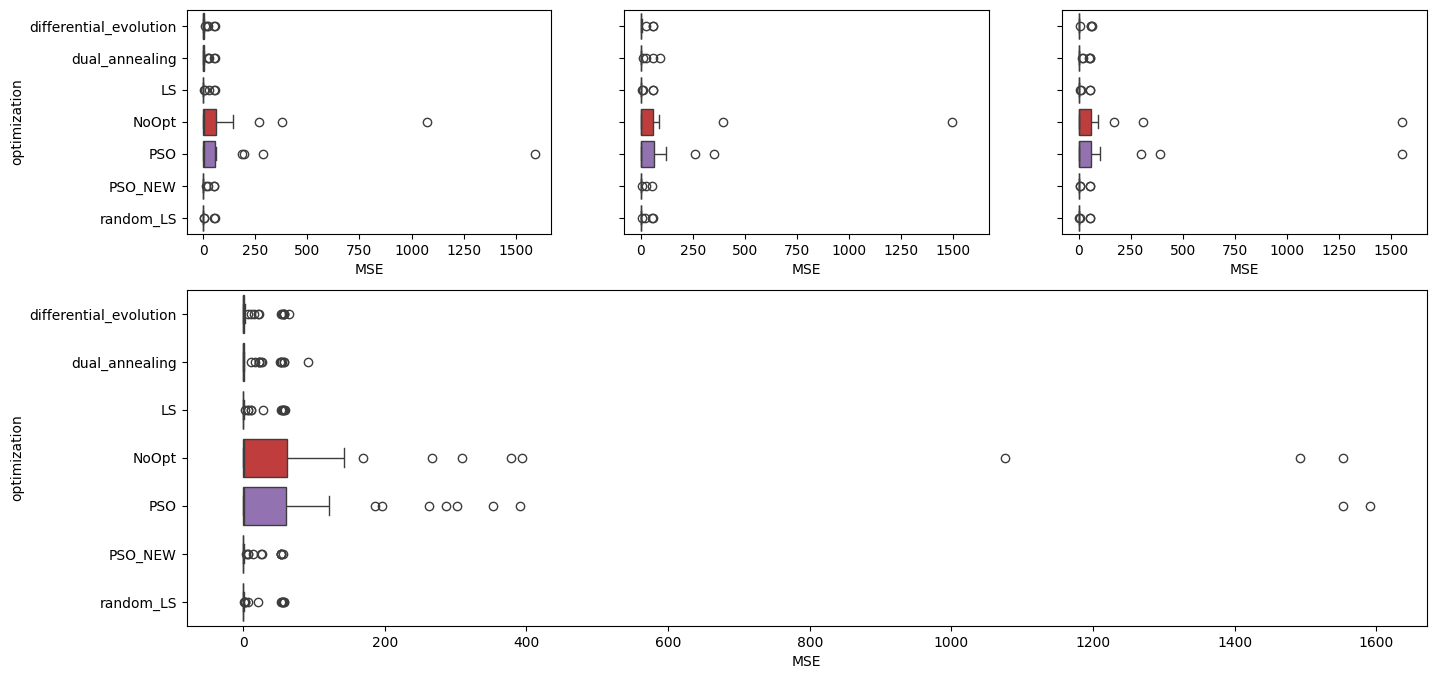

In [13]:
fig = plt.figure(figsize=(16, 8))
gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
ax4 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3, ax4]
ted_datas = [ted_data1, ted_data2, ted_data3]

for i in range(3):
    sns.boxplot(ted_datas[i], x="MSE", y="optimization", hue="optimization", ax=axs[i])
    if i>0:
        axs[i].set_yticklabels("")
        axs[i].set_ylabel("")

sns.boxplot(ted_data, x="MSE", y="optimization", hue="optimization", ax=axs[3])

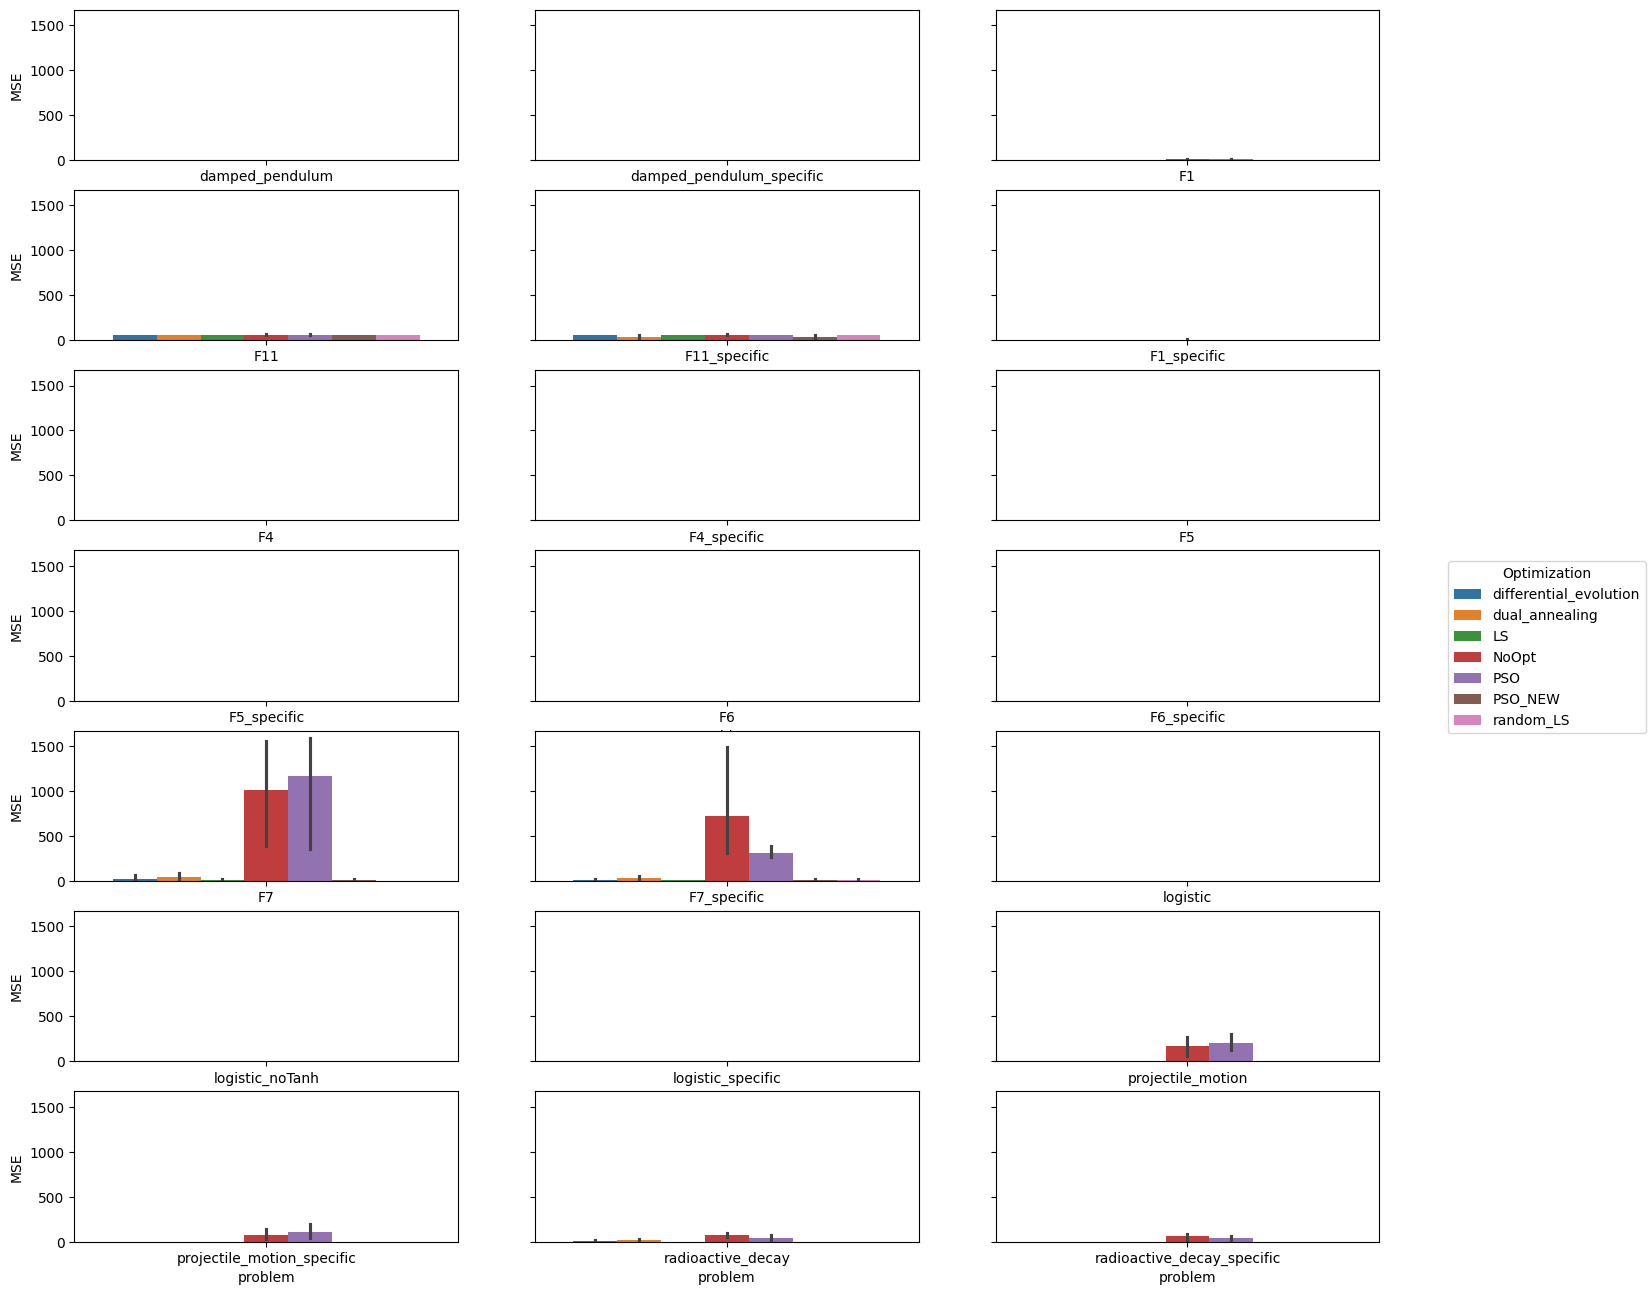

In [14]:
fig, axs = plt.subplots(7, 3, figsize=(18, 16), sharey=True)
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="MSE", hue="optimization", ax=ax)
    ax.get_legend().remove()

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()

## MSE (No Outlier)

In [15]:
problems = ted_data1["problem"].unique()
problems

array(['damped_pendulum', 'damped_pendulum_specific', 'F1', 'F11',
       'F11_specific', 'F1_specific', 'F4', 'F4_specific', 'F5',
       'F5_specific', 'F6', 'F6_specific', 'F7', 'F7_specific',
       'logistic', 'logistic_noTanh', 'logistic_specific',
       'projectile_motion', 'projectile_motion_specific',
       'radioactive_decay', 'radioactive_decay_specific'], dtype=object)

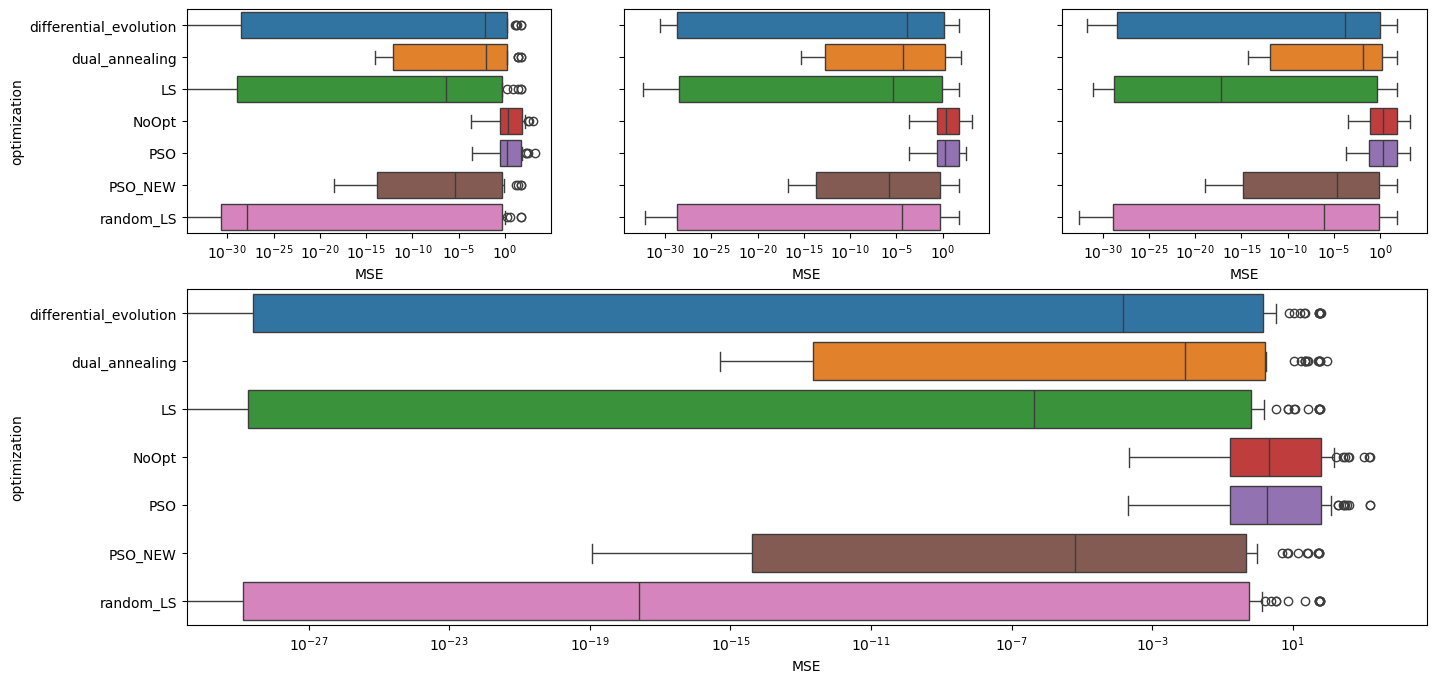

In [16]:
fig = plt.figure(figsize=(16, 8))
gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
ax4 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3, ax4]
ted_datas = [ted_data1, ted_data2, ted_data3]

for i in range(3):
    sns.boxplot(ted_datas[i], x="MSE", y="optimization", hue="optimization", ax=axs[i])
    # axs[i].set_xlim(0, 10)
    axs[i].set_xscale("log")

    if i>0:
        axs[i].set_yticklabels("")
        axs[i].set_ylabel("")

sns.boxplot(ted_data, x="MSE", y="optimization", hue="optimization", ax=axs[3])
axs[3].set_xscale("log")

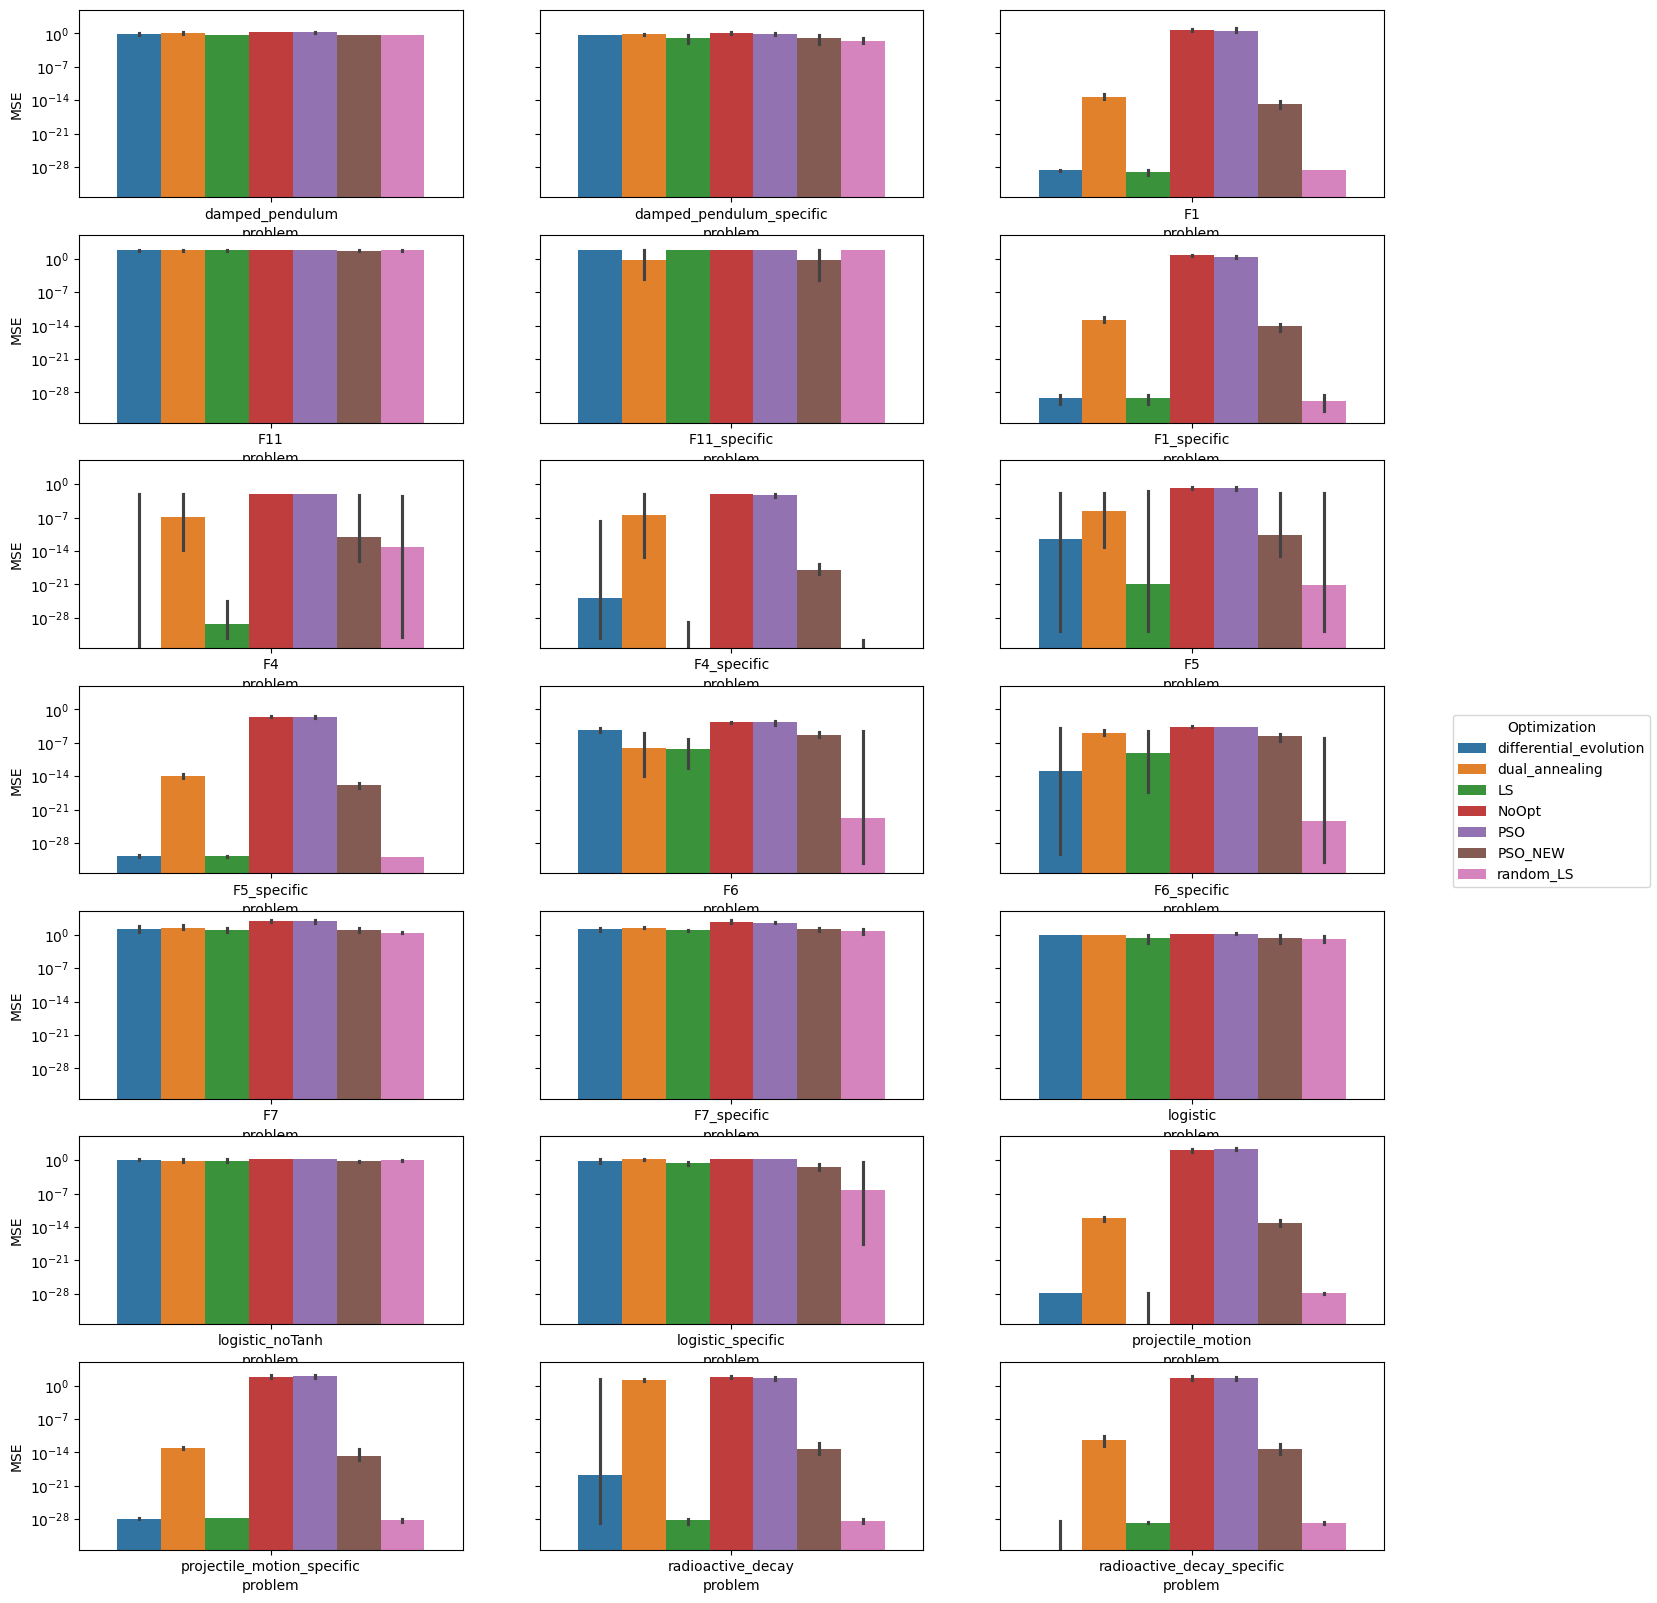

In [17]:
fig, axs = plt.subplots(7, 3, figsize=(18, 20), sharey=True)
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="MSE", hue="optimization", ax=ax)
    ax.get_legend().remove()
    ax.set_yscale("log")

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()

## TED

<Axes: xlabel='TED', ylabel='optimization'>

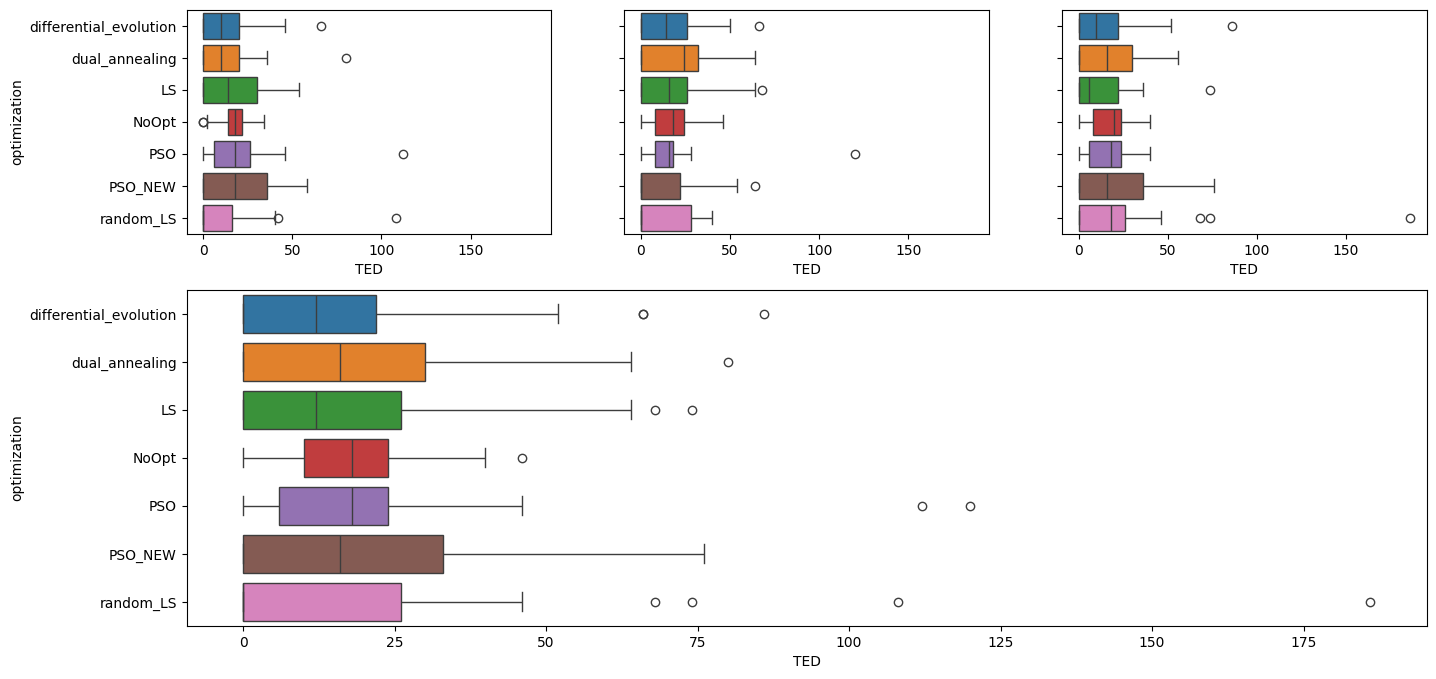

In [18]:
fig = plt.figure(figsize=(16, 8))
gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
ax4 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3, ax4]
ted_datas = [ted_data1, ted_data2, ted_data3]

for i in range(3):
    sns.boxplot(ted_datas[i], x="TED", y="optimization", hue="optimization", ax=axs[i])
    if i>0:
        axs[i].set_yticklabels("")
        axs[i].set_ylabel("")

sns.boxplot(ted_data, x="TED", y="optimization", hue="optimization", ax=axs[3])

<Axes: xlabel='TED', ylabel='optimization'>

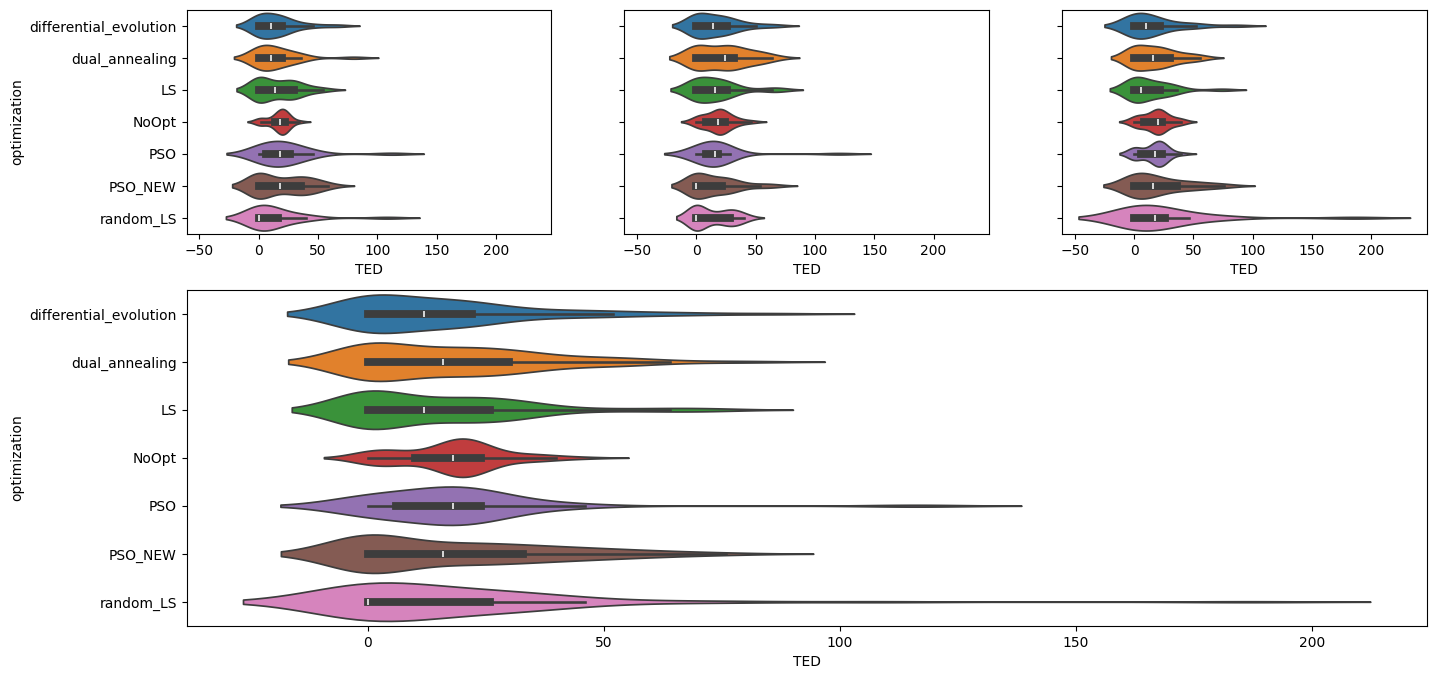

In [23]:
fig = plt.figure(figsize=(16, 8))
gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
ax4 = fig.add_subplot(gs[1, :])

axs = [ax1, ax2, ax3, ax4]
ted_datas = [ted_data1, ted_data2, ted_data3]

for i in range(3):
    sns.violinplot(ted_datas[i], x="TED", y="optimization", hue="optimization", ax=axs[i])
    if i>0:
        axs[i].set_yticklabels("")
        axs[i].set_ylabel("")

sns.violinplot(ted_data, x="TED", y="optimization", hue="optimization", ax=axs[3])

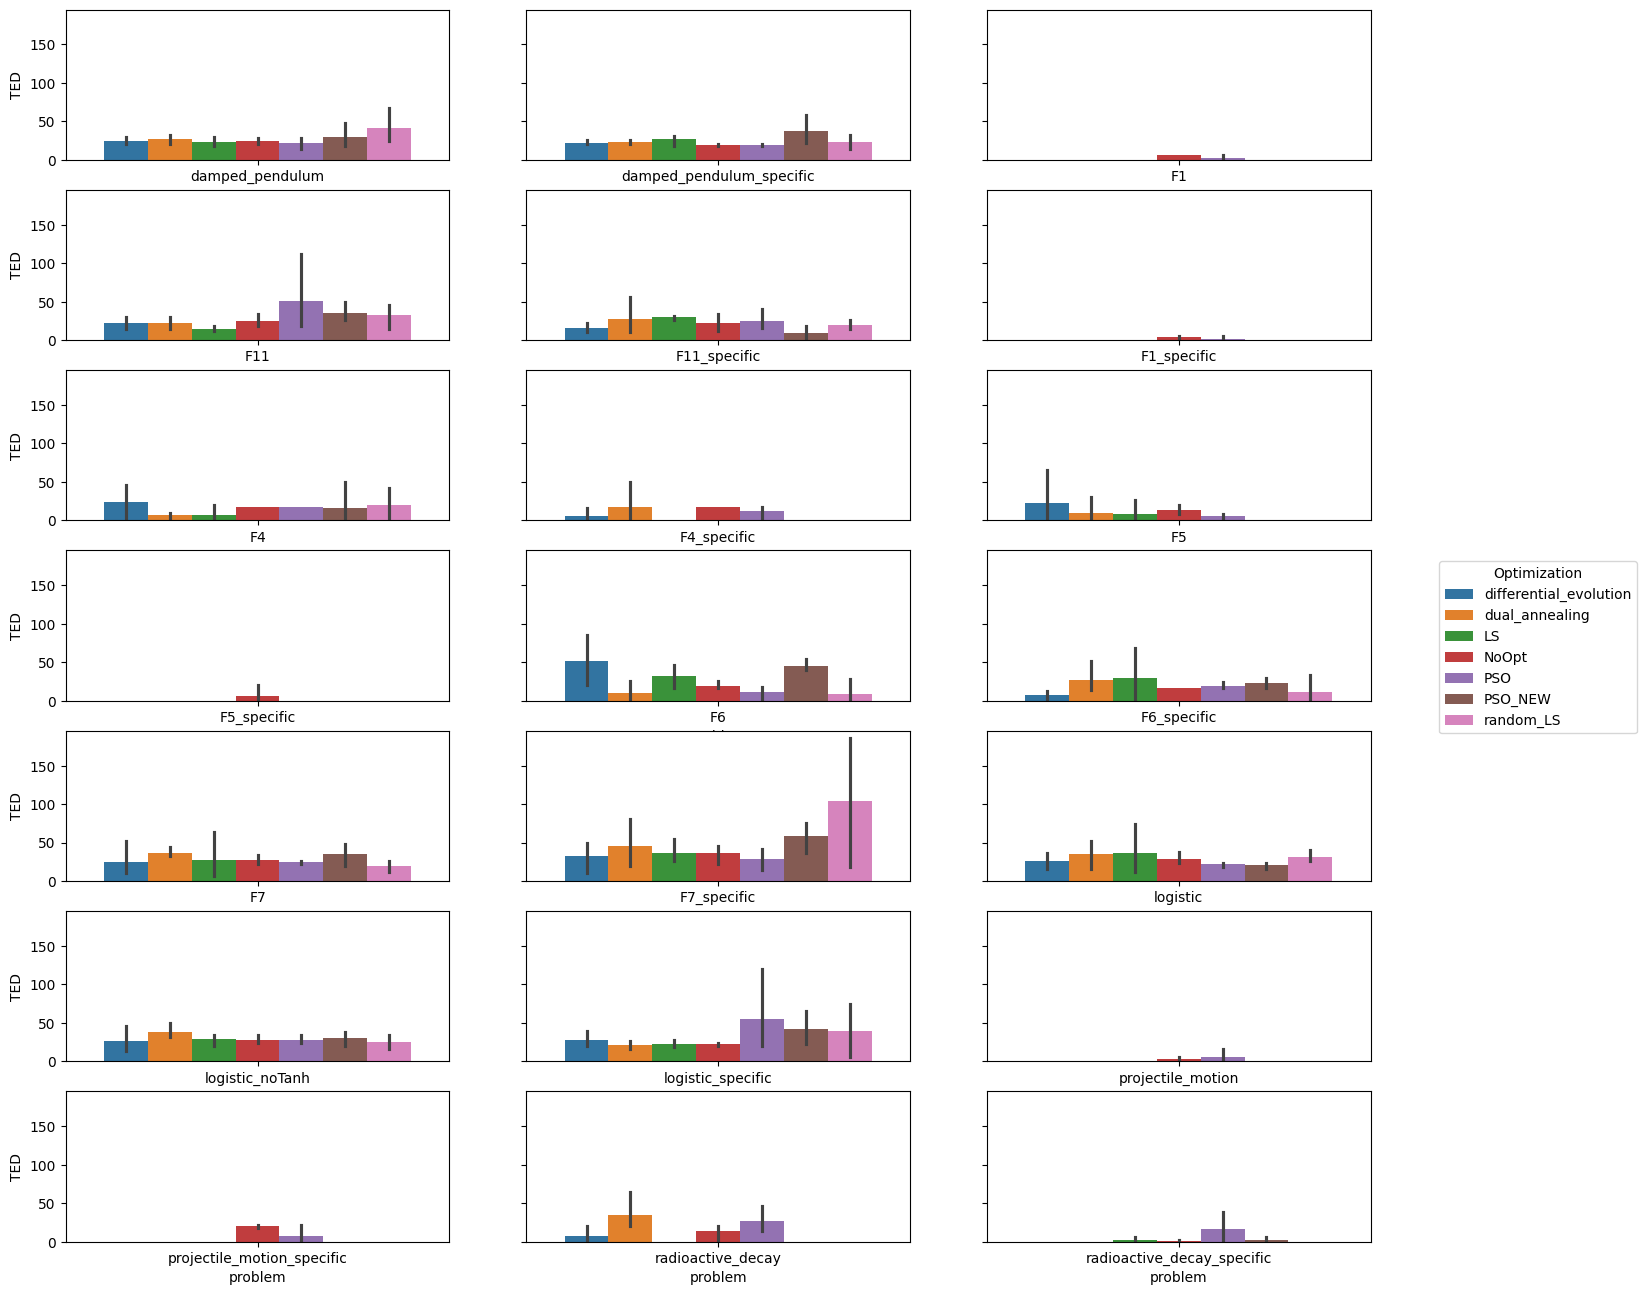

In [24]:
fig, axs = plt.subplots(7, 3, figsize=(18, 16), sharey=True)
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="TED", hue="optimization", ax=ax)
    ax.get_legend().remove()

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()



In [25]:
def TED_MSE_table(optimization, ted_threshold=3, MSE_threshold=1e-6):
    values = optimization[["TED", "MSE"]]

    table = np.zeros((2,2))
    correct = 0

    for index, row in values.iterrows():
        if row.TED <= ted_threshold and row.MSE <= MSE_threshold:
            table[0,0] += 1
        elif row.TED <= ted_threshold and row.MSE >= MSE_threshold:
            table[0,1] += 1
        elif row.TED >= ted_threshold and row.MSE <= MSE_threshold:
            table[1,0] += 1
        elif row.TED >= ted_threshold and row.MSE >= MSE_threshold:
            table[1,1] += 1

        if row.TED == 0:
            correct += 1

    table = pd.DataFrame(table, columns=["Positive", "Negative"], index=["Positive", "Negative"])

    total_TP = table.iloc[0,0] if table.iloc[0,0] > 0 else np.inf

    return table, correct / total_TP

In [26]:
def accuracy(optimization):
    values = optimization[["TED", "MSE"]]

    correct = 0

    for index, row in values.iterrows():
        if row.TED == 0:
            correct += 1

    total = len(values)

    return correct / total


def score(optimization, TED_threshold):
    table = TED_MSE_table(optimization, ted_threshold=TED_threshold)
    
    values = optimization[["TED", "MSE"]]

    correct = 0

    for index, row in values.iterrows():
        if row.TED == 0:
            correct += 1

    total_TP = table.iloc[0,0] if table.iloc[0,0] > 0 else 0.1
    return correct / total_TP


In [27]:
def info_table(data, TED_threshold=3):
    opts = data["optimization"].unique()

    info = {}

    for opt in opts:
        opt_data = data[data["optimization"] == opt]
        table, score = TED_MSE_table(opt_data, TED_threshold)
        acc = accuracy(opt_data)

        info[opt] = [table.iloc[0,0], score * table.iloc[0,0], score, acc]
    
    df = pd.DataFrame(info).T
    df.columns = ["Positive", "N-Perfect", "Perfect Score", "Accuracy"]
    return df


In [28]:
def plot_multiple_confusion_matrix(data, TED_treshold=[3], MSE_threshold=[1e-9]):
    fig, axs = plt.subplots(3, 3, figsize=(20, 14), constrained_layout=True)

    opts = ted_data["optimization"].unique()
    for ax, opt in zip(axs.flatten(), opts):

        sum_table, _ = TED_MSE_table(data[data["optimization"] == "LS"])
        for i,j in itertools.product([0,1], [0,1]):
            sum_table.iloc[i,j] = 0
            
        combinations = list(itertools.product(TED_treshold, MSE_threshold))

        for ted, mse in combinations:
            table, score = TED_MSE_table(data[data["optimization"] == opt], ted, mse)
            sum_table += table

        table = sum_table/len(combinations)

        sns.heatmap(table, annot=True, ax=ax, cmap="rocket")
        ax.set_title(opt)

    plt.suptitle(f"'Confusion Matrix' - TED ({TED_treshold}) X MSE ({MSE_threshold})", fontsize=20)
    plt.show()

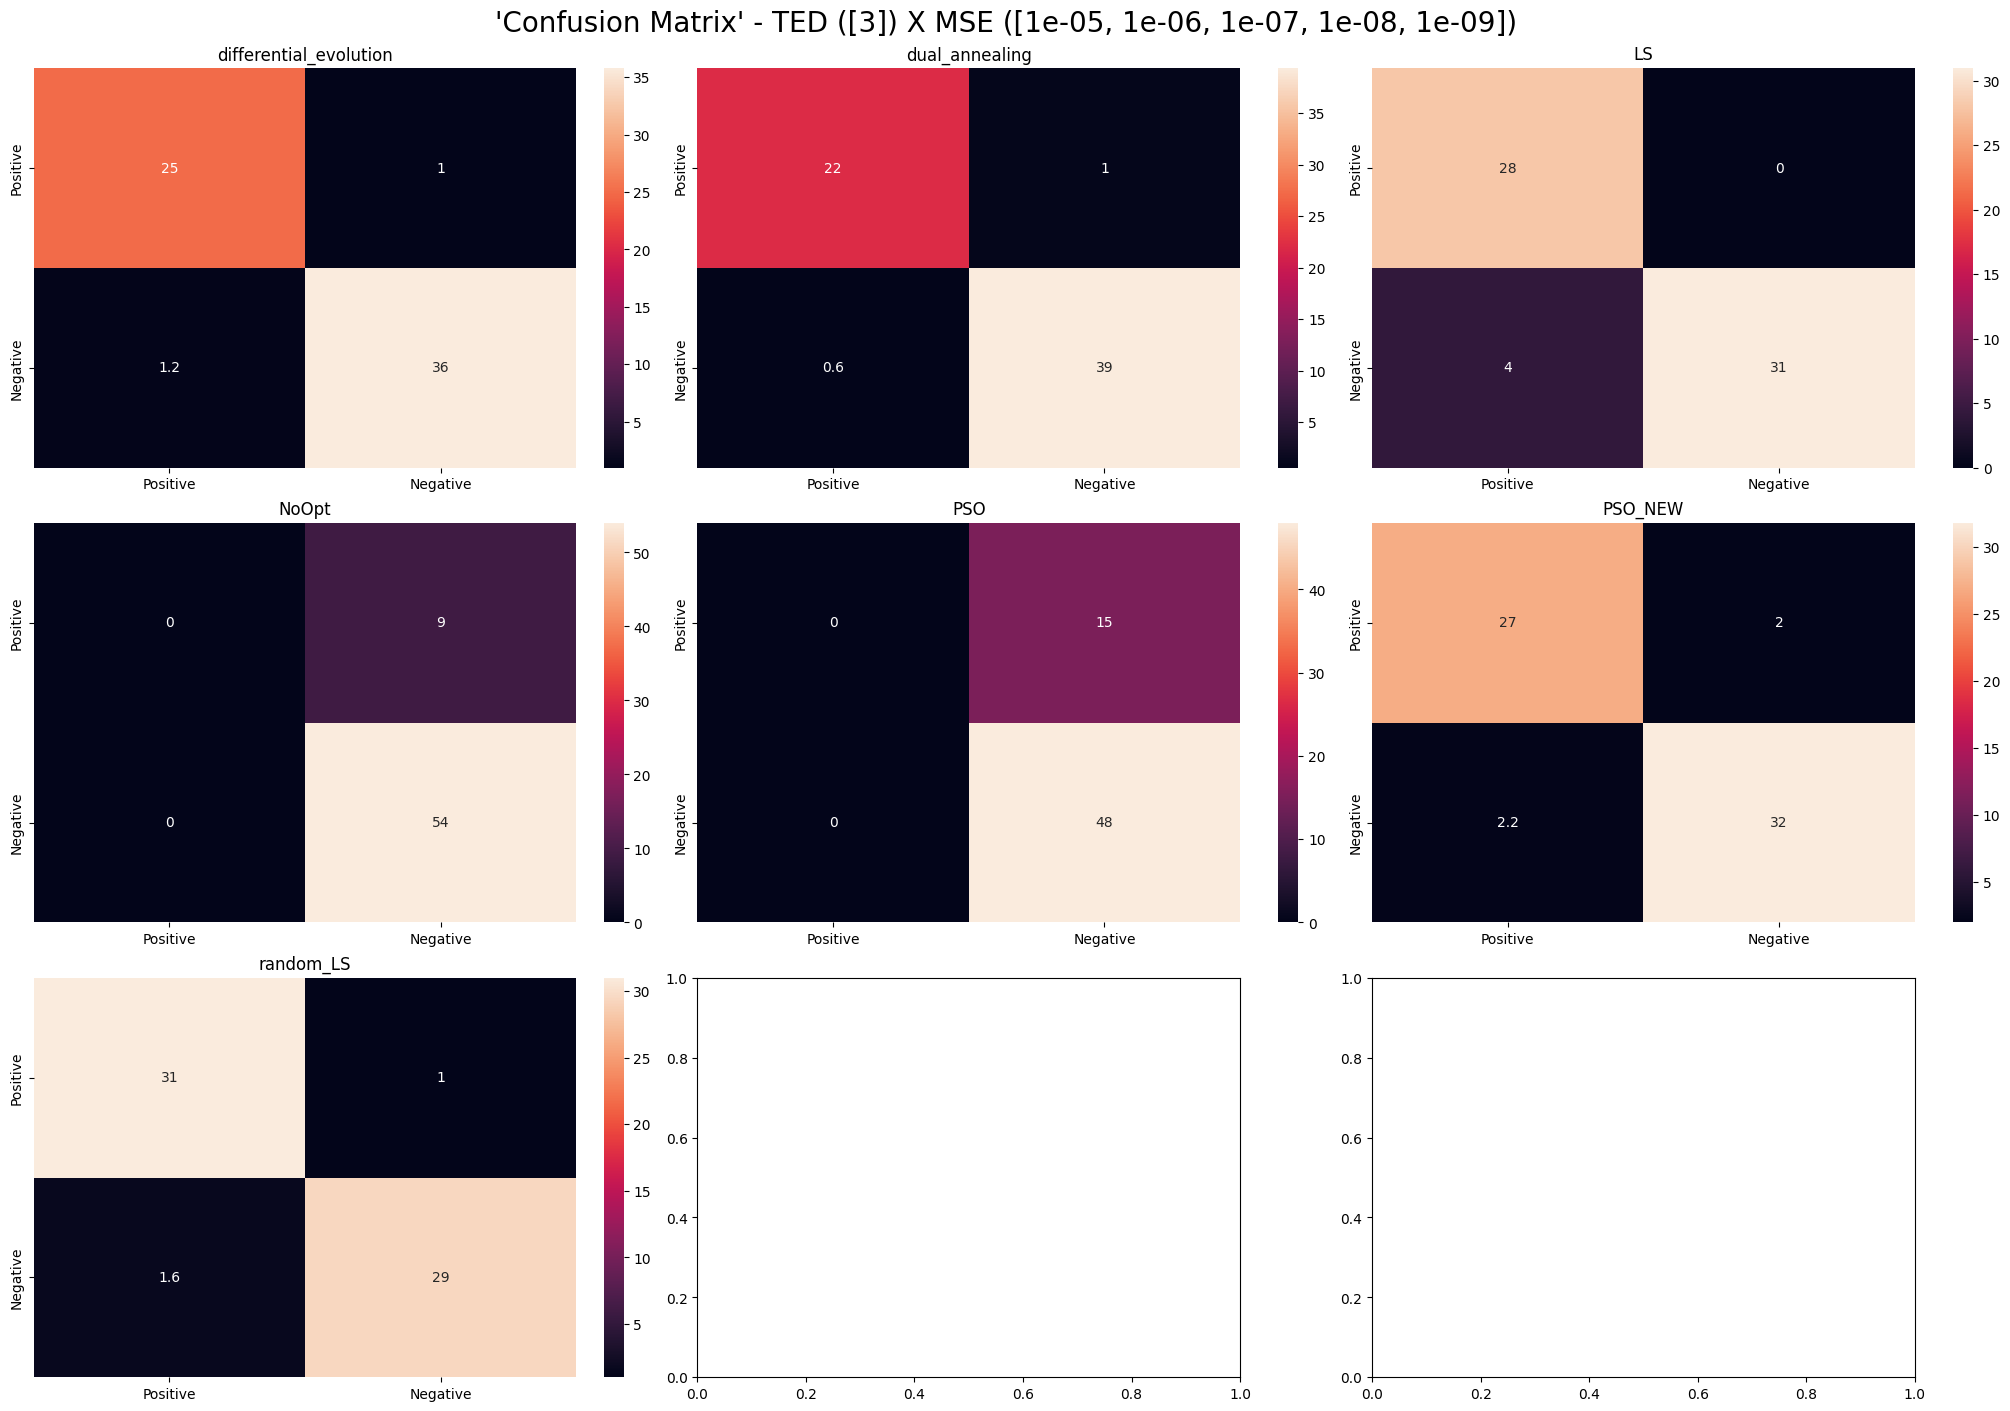

In [29]:
plot_multiple_confusion_matrix(ted_data, TED_treshold=[3], MSE_threshold=[1e-5, 1e-6, 1e-7, 1e-8, 1e-9])

# Scatter Plot

In [30]:
color_map = sns.color_palette("icefire", 7)

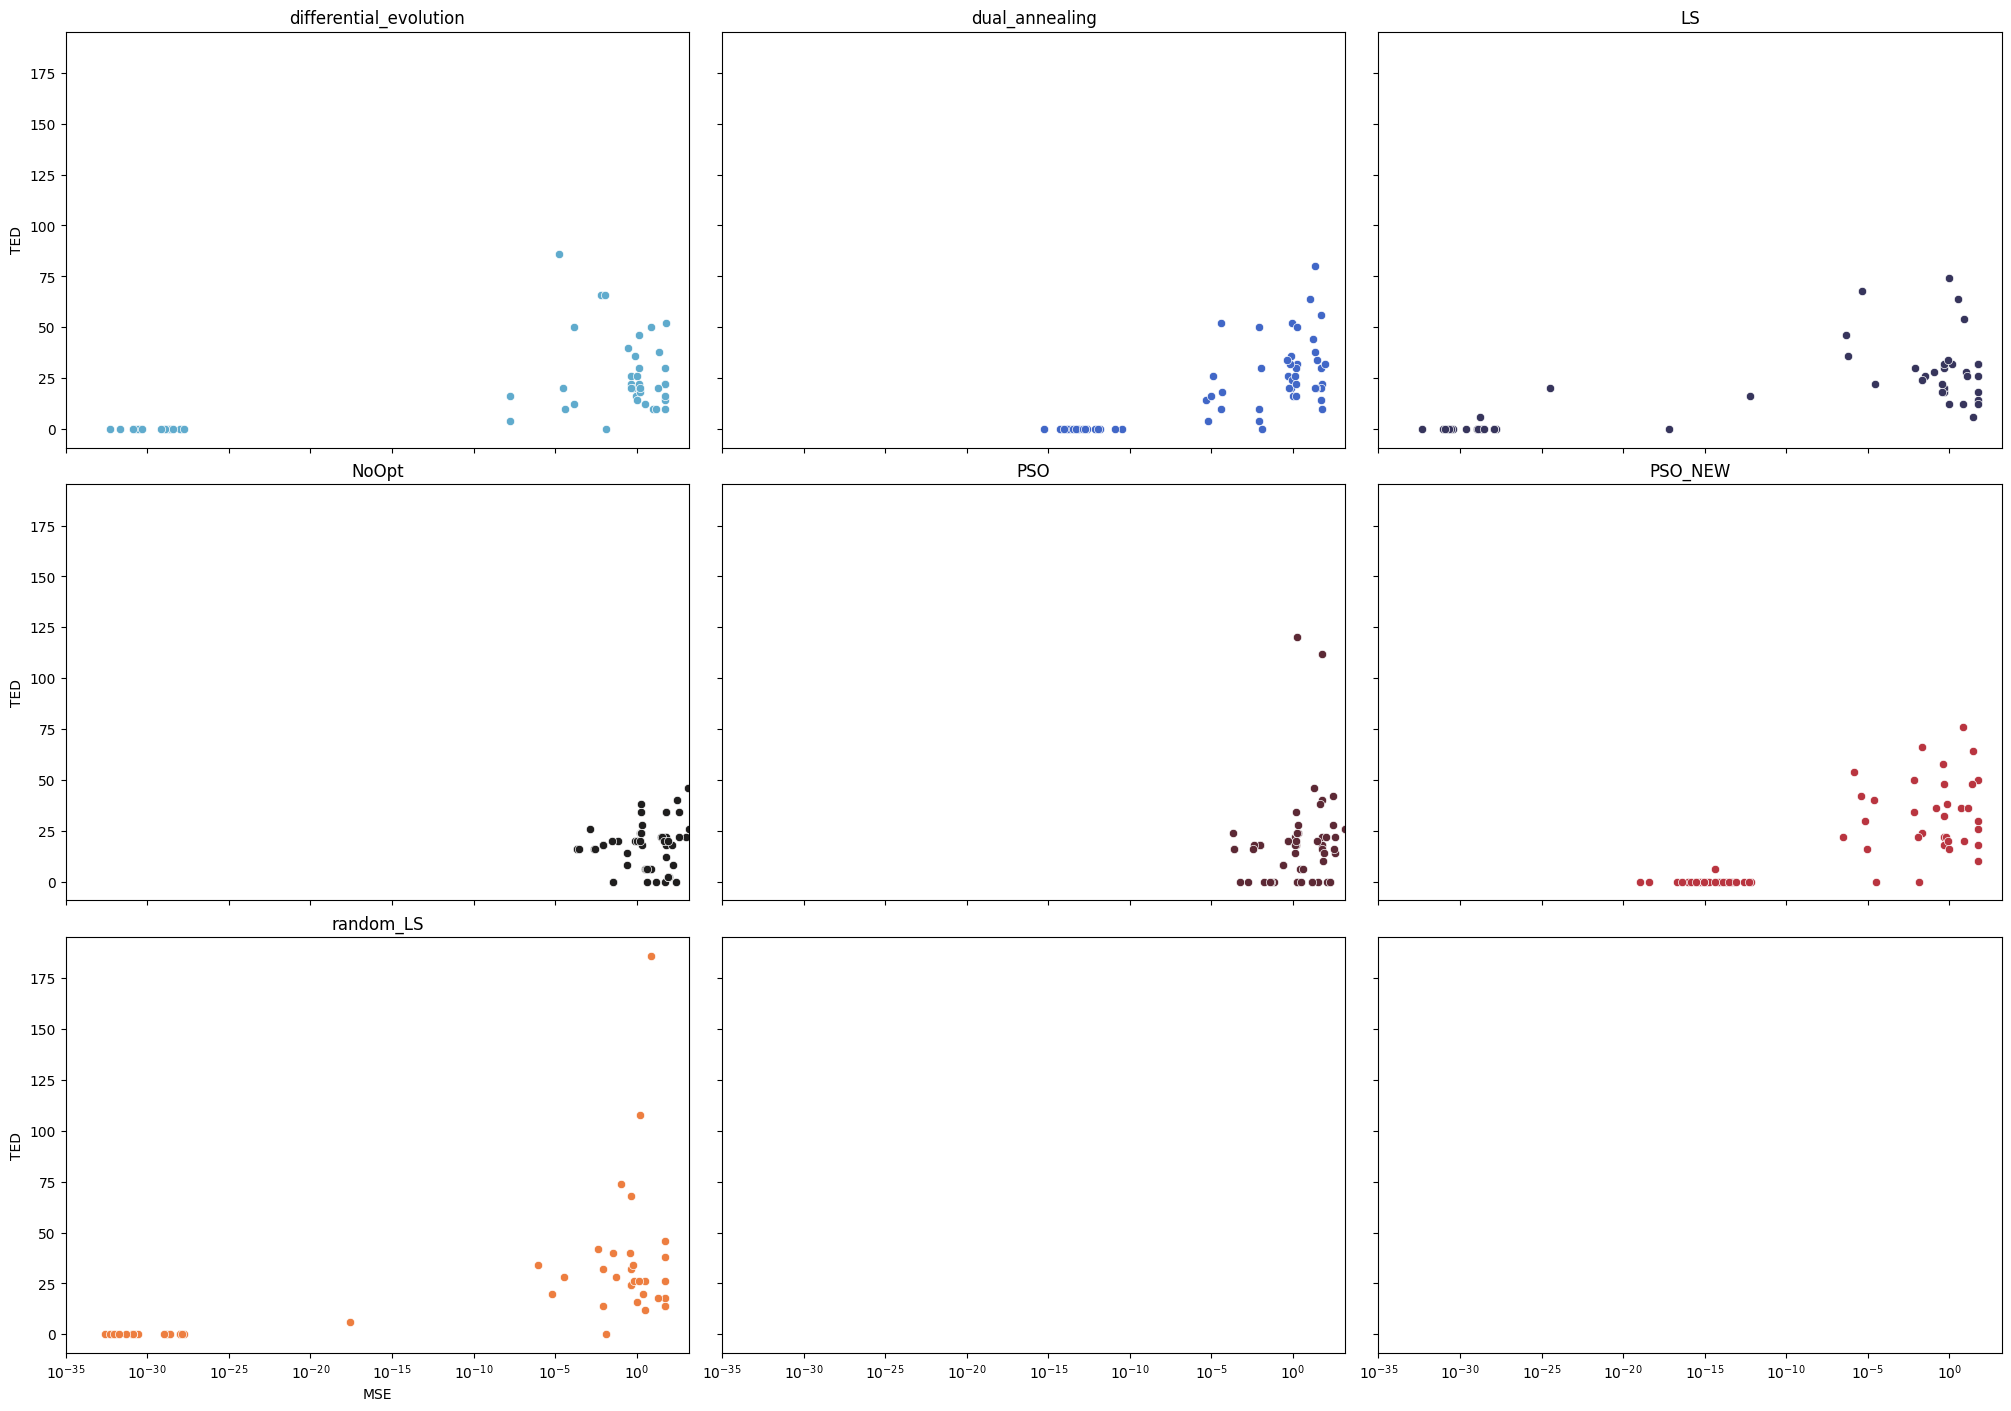

In [32]:
fig, axs = plt.subplots(3, 3, figsize=(20, 14), constrained_layout=True, sharey=True, sharex=True)

opts = list(ted_data["optimization"].unique())
scores = {}
n_true = {}

c=0 

for ax, opt in zip(axs.flatten(), opts):
    filt_data = ted_data[ted_data["optimization"] == opt]

    ax.set_xscale("log")
    sns.scatterplot(data=filt_data, x="MSE", y="TED", color=color_map[c], ax=ax)
    # ax.vlines(1e-4, 0, 35, color="black", linestyle="--")
    
    xmin, xmax = 1e-35, 1591.38

    ax.set_title(opt)
    
    ax.set_xlim(xmin, xmax)
    c = (c+1)%7


# plt.suptitle("'Confusion Matrix' - TED X MSE", fontsize=20)
plt.show()

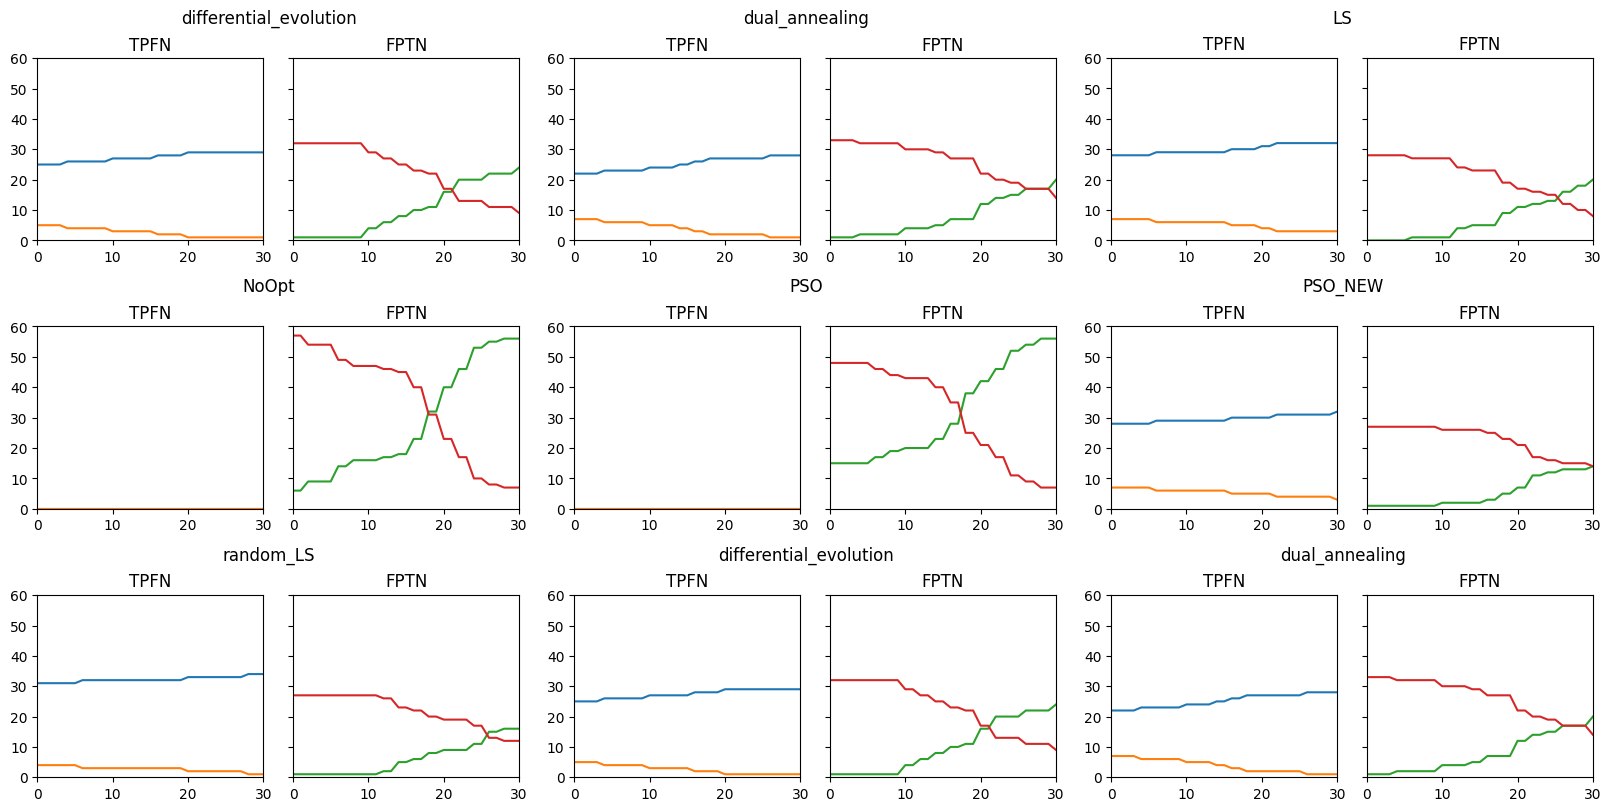

In [33]:
# fig, axs = plt.subplots(3, 3, figsize=(20, 14), constrained_layout=True, sharex=True, sharey=True)
fig = plt.figure(constrained_layout=True, figsize=(16, 8))
subfigs = fig.subfigures(3,3)

MSE_threshold = [1e-4]
TED_treshold = list(range(0, 31))

opts = list(ted_data["optimization"].unique())
# opts.remove("NoOpt")
# opts.remove("PSO")
# for ax, opt in zip(axs.flatten(), opts):
for outerind, subfig in enumerate(subfigs.flat):

    sum_table, _ = TED_MSE_table(ted_data[ted_data["optimization"] == "LS"])
    for i,j in itertools.product([0,1], [0,1]):
        sum_table.iloc[i,j] = 0
        
    combinations = list(itertools.product(TED_treshold, MSE_threshold))

    TP = []
    FP = []
    FN = []
    TN = []

    for ted, mse in combinations:
        table, score = TED_MSE_table(ted_data[ted_data["optimization"] == opts[(outerind)%7]], ted, mse)
        TP.append(table.iloc[0,0])
        FP.append(table.iloc[0,1])
        FN.append(table.iloc[1,0])
        TN.append(table.iloc[1,1])

    axs = subfig.subplots(1, 2, sharex=True, sharey=True)
    subfig.suptitle(opts[(outerind)%7])
    # sns.heatmap(table, annot=True, ax=ax, cmap="rocket")
    sns.lineplot(x=TED_treshold, y=TP, ax=axs[0], c="tab:blue")
    sns.lineplot(x=TED_treshold, y=FN, ax=axs[0], c="tab:orange") 
    sns.lineplot(x=TED_treshold, y=FP, ax=axs[1], c="tab:green") 
    sns.lineplot(x=TED_treshold, y=TN, ax=axs[1], c="tab:red") 
    # ax.set_title(opt)

    # for ax in axs.flat:
    #     ax.set_xticks([])
    #     ax.set_yticks([])

    titles = ["TP" + "FN", "FP" + "TN"]
    for c, ax in enumerate(axs.flatten()):
        ax.set_xlim(0, 30)
        ax.set_ylim(0, 60)
        ax.set_title(titles[c])

# plt.suptitle(f"'Confusion Matrix' - TED ({TED_treshold}) X MSE ({MSE_threshold})", fontsize=20)
plt.show()